<a href="https://colab.research.google.com/github/prachi1101/TASK-1-/blob/main/TASK2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas numpy matplotlib seaborn


=== Missing Values Before Cleaning ===
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

=== Missing Values After Cleaning ===
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
FamilySize     0
IsAlone        0
dtype: int64


<ipython-input-2-3673113665>:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
<ipython-input-2-3673113665>:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

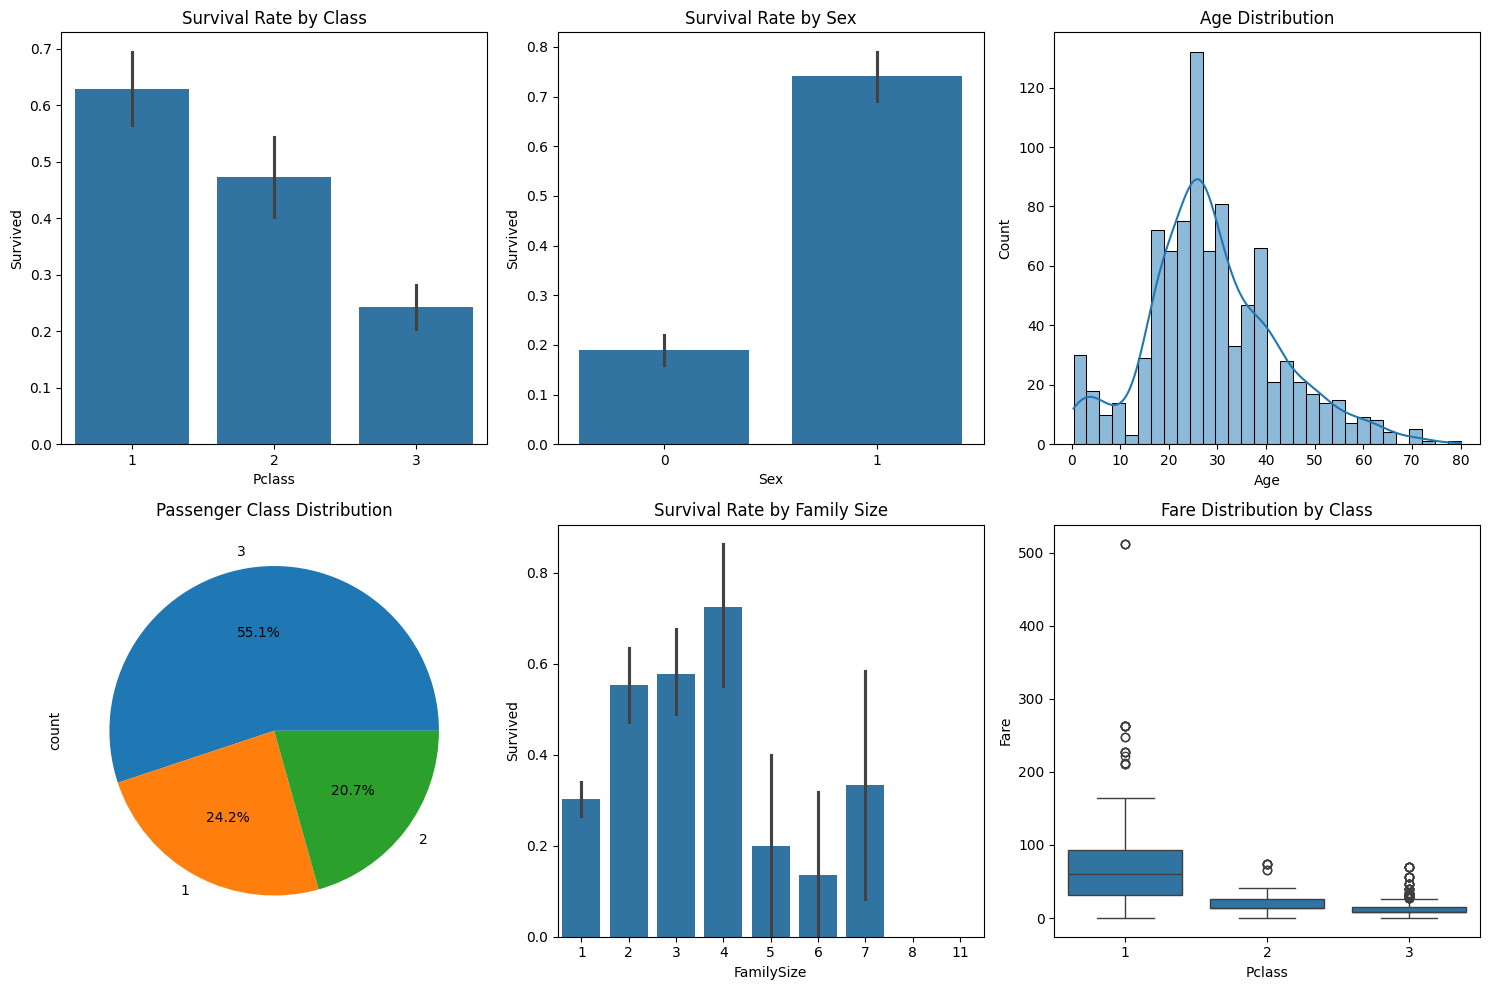

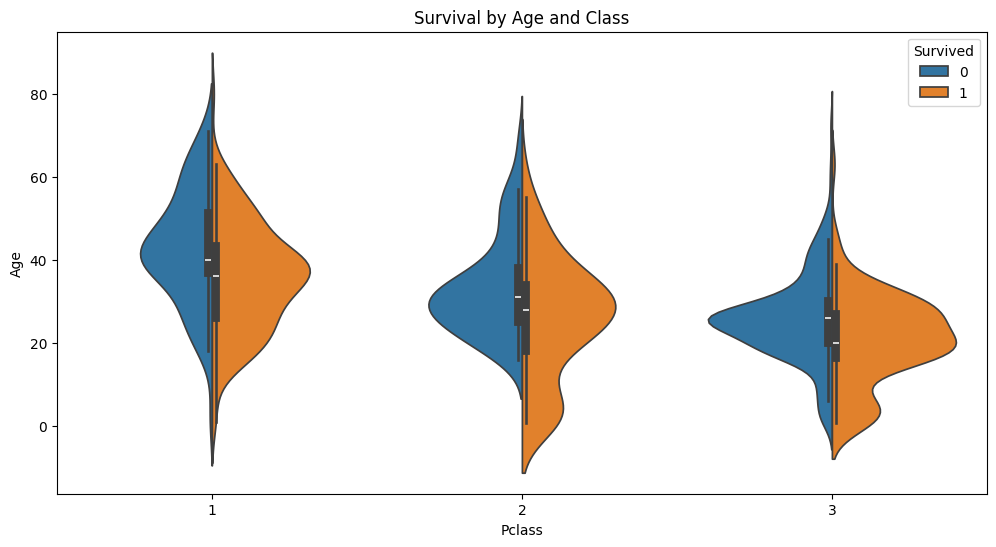

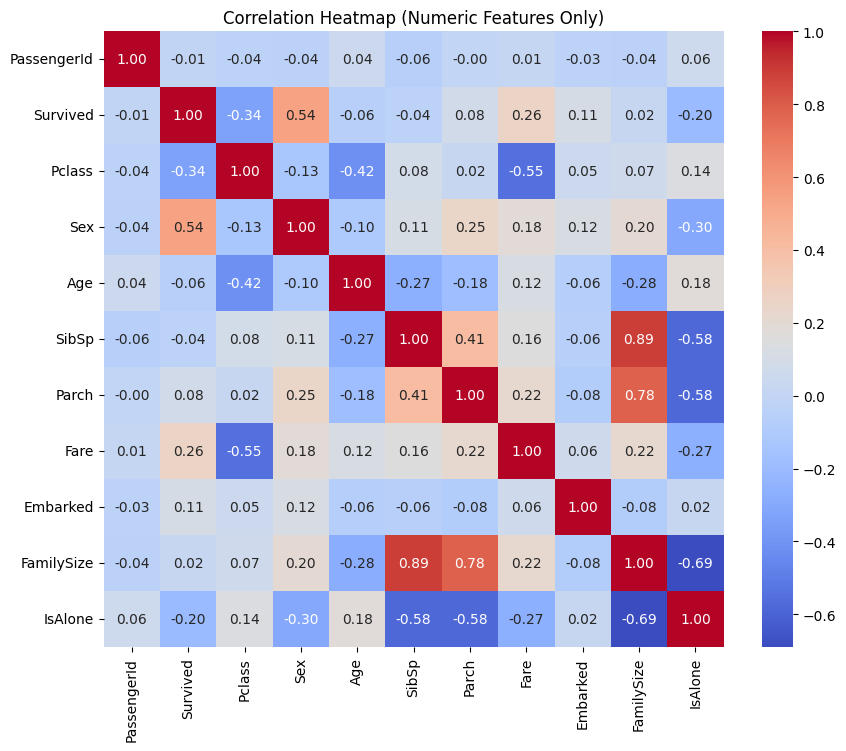


=== Numerical Summary ===
       PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642    0.352413   29.135432   
std     257.353842    0.486592    0.836071    0.477990   13.490884   
min       1.000000    0.000000    1.000000    0.000000    0.420000   
25%     223.500000    0.000000    2.000000    0.000000   21.000000   
50%     446.000000    0.000000    3.000000    0.000000   26.000000   
75%     668.500000    1.000000    3.000000    1.000000   36.750000   
max     891.000000    1.000000    3.000000    1.000000   80.000000   

            SibSp       Parch        Fare    Embarked  FamilySize     IsAlone  
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000  
mean     0.523008    0.381594   32.204208    0.361392    1.904602    0.602694  
std      1.102743    0.806057   49.693429    0.635673    1.613459    0.489615  
min      0.000000    0

<ipython-input-2-3673113665>:121: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('AgeGroup')['Survived'].mean())


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/train.csv')

# Data Cleaning
print("=== Missing Values Before Cleaning ===")
print(df.isnull().sum())

# Fill missing age with median age grouped by title and class
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

title_median_age = df.groupby(['Title', 'Pclass'])['Age'].median().reset_index()

for index, row in df[df['Age'].isnull()].iterrows():
    title = row['Title']
    pclass = row['Pclass']
    median_age = title_median_age[(title_median_age['Title'] == title) &
                                (title_median_age['Pclass'] == pclass)]['Age'].values[0]
    df.loc[index, 'Age'] = median_age

# Fill remaining missing values
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Cabin'] = df['Cabin'].fillna('Unknown')

# Create new features
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

# Convert categorical features to numeric for correlation analysis
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

print("\n=== Missing Values After Cleaning ===")
print(df.isnull().sum())

# Exploratory Data Analysis
plt.figure(figsize=(15, 10))

# 1. Survival Rate Analysis
plt.subplot(2, 3, 1)
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Class')

plt.subplot(2, 3, 2)
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')

# 2. Passenger Demographics
plt.subplot(2, 3, 3)
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')

plt.subplot(2, 3, 4)
df['Pclass'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Passenger Class Distribution')

# 3. Family Relationships
plt.subplot(2, 3, 5)
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival Rate by Family Size')

# 4. Fare Analysis
plt.subplot(2, 3, 6)
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Class')

plt.tight_layout()
plt.show()

# Additional Analysis
# Survival by Age and Class
plt.figure(figsize=(12, 6))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True)
plt.title('Survival by Age and Class')
plt.show()

# Correlation Heatmap - Select only numeric columns
plt.figure(figsize=(10, 8))
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()

# Numerical Summary Statistics
print("\n=== Numerical Summary ===")
print(df.describe())

# Categorical Summary
print("\n=== Categorical Summary ===")
print("\nEmbarkation Points:")
print(df['Embarked'].value_counts())
print("\nSurvival Rates:")
print("\nBy Class:")
print(df.groupby('Pclass')['Survived'].mean())
print("\nBy Sex:")
print(df.groupby('Sex')['Survived'].mean())
print("\nBy Embarkation Point:")
print(df.groupby('Embarked')['Survived'].mean())

# Family Analysis
print("\n=== Family Analysis ===")
print("Average family size:", df['FamilySize'].mean())
print("Survival rate for singles:", df[df['IsAlone'] == 1]['Survived'].mean())
print("Survival rate for families:", df[df['IsAlone'] == 0]['Survived'].mean())

# Age Group Analysis
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 30, 50, 100],
                        labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
print("\nSurvival by Age Groups:")
print(df.groupby('AgeGroup')['Survived'].mean())

# Title Analysis
print("\n=== Title Analysis ===")
print(df['Title'].value_counts())
print("\nSurvival by Title:")
print(df.groupby('Title')['Survived'].mean())